In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs

In [4]:
x,y = make_blobs(n_samples = 1000, centers=3, n_features=2)

In [5]:
x

array([[-6.46301014, -6.95535421],
       [-4.75589714,  5.94162316],
       [ 6.70032058, -3.14180374],
       ...,
       [ 6.97569247, -0.30745965],
       [ 8.52394838,  1.36998308],
       [-3.66881971, -6.63806983]])

In [6]:
y

array([2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1,
       2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 2, 0,
       1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0,
       0, 1, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 2, 0,
       0, 2, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1,
       2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1,
       2, 2, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 0,
       1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 0,
       1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1,

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

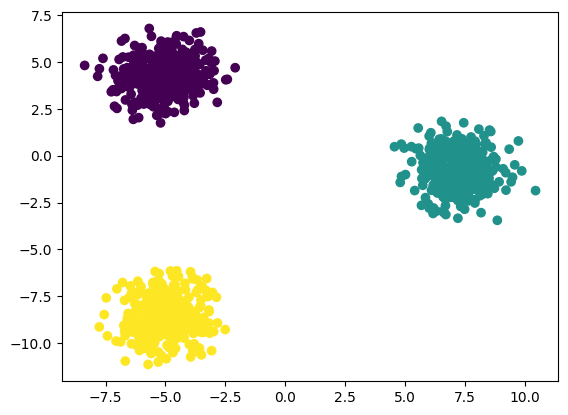

In [11]:
plt.scatter(x[:,0], x[:, 1], c = y)

In [12]:
### standardisation --feature scaling
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [17]:
x_train_pre = scaler.fit_transform(xtrain)
x_test_pre = scaler.fit_transform(xtest)

In [ ]:
from sklearn.cluster import KMeans

In [19]:
###elbow method to select the k value

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x_train_pre)
    wcss.append(kmeans.inertia_)


In [20]:
wcss

[1600.0000000000005,
 910.77411390715,
 49.524228887232745,
 42.91825420479617,
 38.012710775164,
 32.0935039625597,
 28.026973628386113,
 26.49403891275963,
 21.09966127744034,
 20.138532106067906]

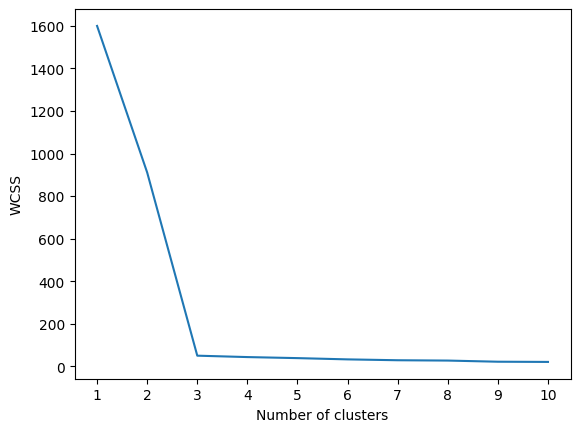

In [23]:
### plot elbow curve

plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans = KMeans(n_clusters= 3, init = "k-means++")

In [25]:
kmeans.fit_predict(x_train_pre)

array([2, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0,
       0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 0,
       2, 2, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 0,
       1, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0,
       0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1,
       2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 2, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 1, 1,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1,

In [ ]:
y_pred = kmeans.predict(x_test_pre)

In [28]:
y_pred

array([1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0,
       2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0,
       2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1,
       2, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1,
       0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 0,
       1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2, 0,
       1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 0, 0,
       0, 1], dtype=int32)

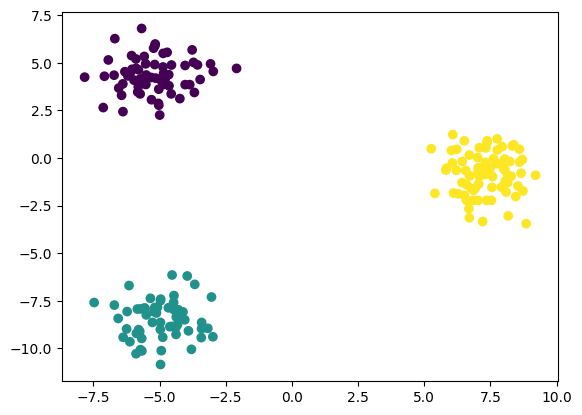

In [30]:
plt.scatter(xtest[:, 0], xtest[:, 1], c = y_pred)

In [32]:
### validating the k value:
# 1) KneeLocator
# 2) Silhoutte scoring

In [39]:
###KneeLocator

In [34]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from kneed import KneeLocator

In [36]:
kl = KneeLocator(range(1, 11), wcss, curve = "convex", direction = "decreasing")

In [37]:
kl.elbow

np.int64(3)

In [38]:
### silhoutte scoring

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
silhoutte_coeff  = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init = "k-means++")
    kmeans.fit(x_train_pre)
    score = silhouette_score(x_train_pre, kmeans.labels_)
    silhoutte_coeff.append(score)

In [42]:
silhoutte_coeff

[np.float64(0.6029697326263529),
 np.float64(0.8637405896715472),
 np.float64(0.6827107130087964),
 np.float64(0.6938735115436018),
 np.float64(0.5226851230545724),
 np.float64(0.510088072540155),
 np.float64(0.3288869225039583),
 np.float64(0.3609952026383806),
 np.float64(0.3382906989216983)]

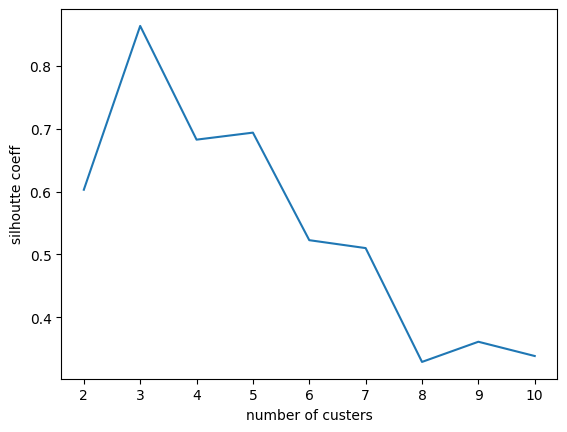

In [44]:
###plotting silhoutte score
plt.plot(range(2, 11), silhoutte_coeff)
plt.xticks(range(2, 11))
plt.xlabel("number of custers")
plt.ylabel("silhoutte coeff")
plt.show()